In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def to_timestamp(value):
    return pd.Timestamp(value, unit='s')


def parse_flags(value):
    return value.strip().split('|')

In [3]:
def plot(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.DayLocator())
    #ax.xaxis.set_minor_locator(mdates.HourLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A %d'))
    #ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
    if 'title' in kwargs:
        fig.title(kwargs['title'])
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    data, x, y = kwargs.get('data'), kwargs.get('x'), kwargs.get('y')
    if isinstance(y, str):
        y = {y: y}
    for key, value in y.items():
        if 'by' in kwargs:
            for catg in data[kwargs['by']].unique():
                ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
        else:
            ax.plot(x, value, data=data, label=key)
    if 'by' in kwargs or len(y) > 1:
        ax.legend()
    if 'path' in kwargs:
        plt.savefig(kwargs['path'], bbox_inches='tight')
    plt.show()

In [4]:
df = pd.read_csv('tmp/top_100_nodes_20211206_to_20211212.csv')

In [5]:
df_types = {
    'nickname': 'string',
    'ip': 'string',
    'consensus_time': to_timestamp,
    'pub_time': to_timestamp,
    'or_port': 'UInt16',
    'dir_port': 'UInt16',
    'bandwidth': 'UInt32',
    'flags': parse_flags
}
for column, dtype in df_types.items():
    if isinstance(dtype, str):
        df[column] = df[column].astype(dtype)
    else:
        df[column] = df[column].apply(dtype)

df.sort_values(by=['consensus_time', 'pub_time'], inplace=True)

In [6]:
df.head()

,nickname,consensus_time,pub_time,ip,or_port,dir_port,bandwidth,flags
16067,Cobalt,2021-12-06,2021-12-05 05:35:05,135.125.181.54,9001,0,86000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
16012,Unnamed,2021-12-06,2021-12-05 05:36:14,54.36.166.86,9001,9030,120000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
16011,Unnamed,2021-12-06,2021-12-05 06:22:46,51.91.73.194,9001,9030,120000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
16042,Paphos,2021-12-06,2021-12-05 06:25:56,62.210.205.228,443,80,95000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
16019,arbertDelroth,2021-12-06,2021-12-05 06:26:23,212.51.139.36,143,0,110000,"[Fast, Running, V2Dir, Valid]"


<AxesSubplot:xlabel='consensus_time'>

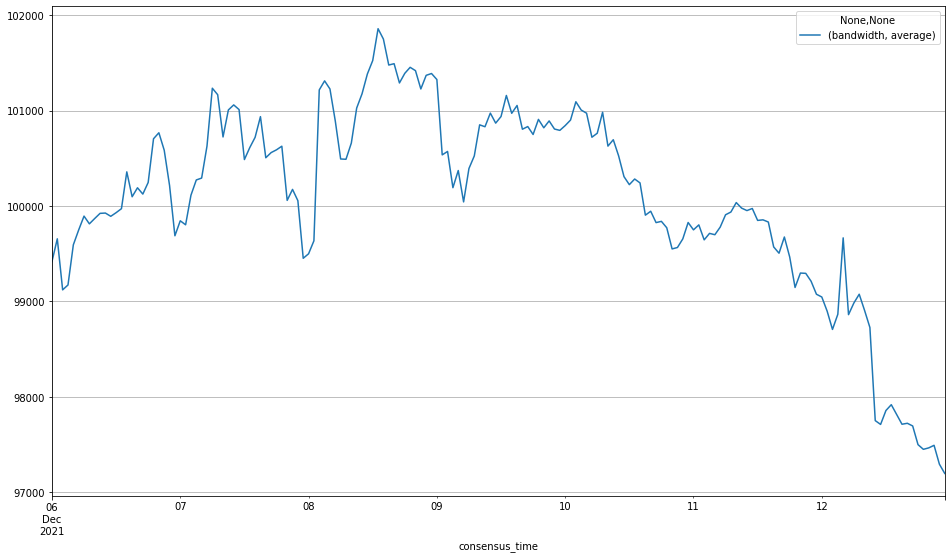

In [7]:
figure, ax = plt.subplots(figsize=(16,9))
df.groupby(by='consensus_time').agg({'bandwidth': [np.average]}).plot(ax=ax, grid=True)

<AxesSubplot:xlabel='consensus_time'>

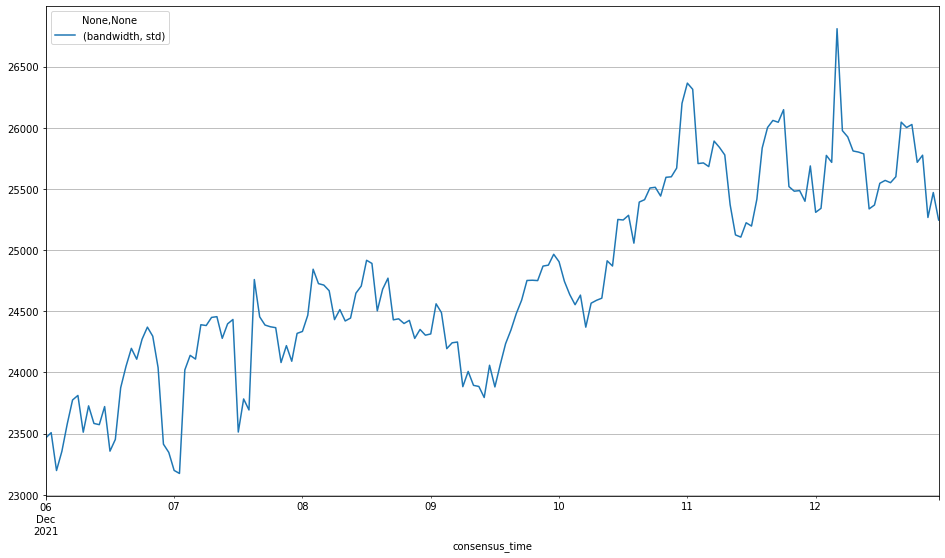

In [8]:
figure, ax = plt.subplots(figsize=(16,9))
df.groupby(by='consensus_time').agg({'bandwidth': [np.std]}).plot(ax=ax, grid=True)

In [11]:
gf = df.groupby(by='consensus_time').agg(
    med_bd=('bandwidth', np.median)
).reset_index()
gf.head()
#plot(data=gf, x='consensus_time', y='med_bd')

,consensus_time,med_bd
0,2021-12-06 00:00:00,92000.0
1,2021-12-06 01:00:00,92500.0
2,2021-12-06 02:00:00,92000.0
3,2021-12-06 03:00:00,92000.0
4,2021-12-06 04:00:00,92500.0


ValueError: values must be a 1D array

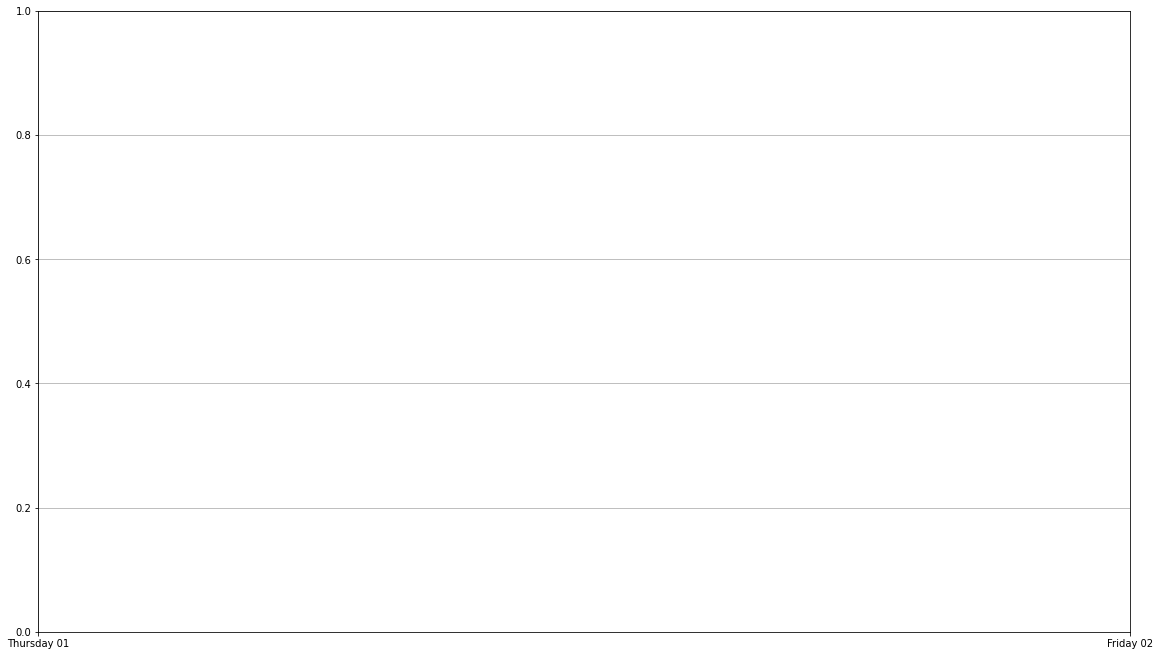

In [12]:
plot(data=gf, x='consensus_time', y='med_bd')